In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [65]:
df = pd.read_csv('/content/Mall_Customers.xls')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


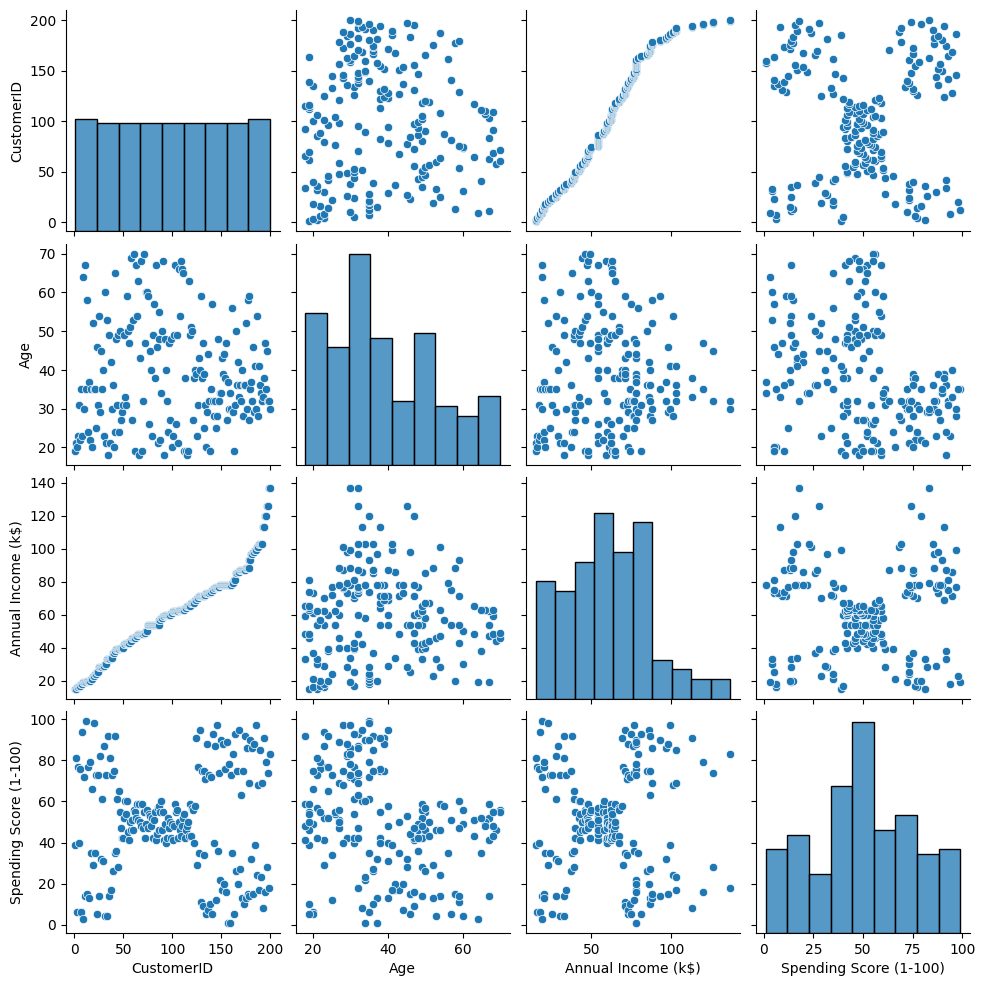

In [66]:
sns.pairplot(df)

In [67]:
X = df.iloc[:, [3, 4]]

In [68]:
X.corr()

,Annual Income (k$),Spending Score (1-100)
Annual Income (k$),1.000000,0.009903
Spending Score (1-100),0.009903,1.000000


In [69]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
type(X)

numpy.ndarray

In [70]:
#validating k
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

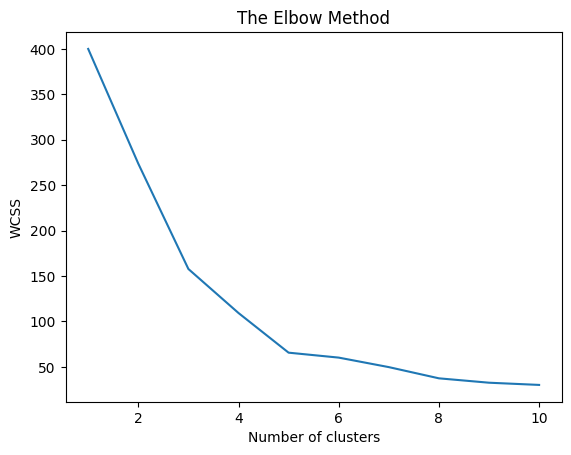

In [71]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [72]:

from kneed import KneeLocator

In [73]:
kl = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')

In [74]:
k = kl.elbow

In [75]:
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

In [76]:
y = kmeans.fit_predict(X)

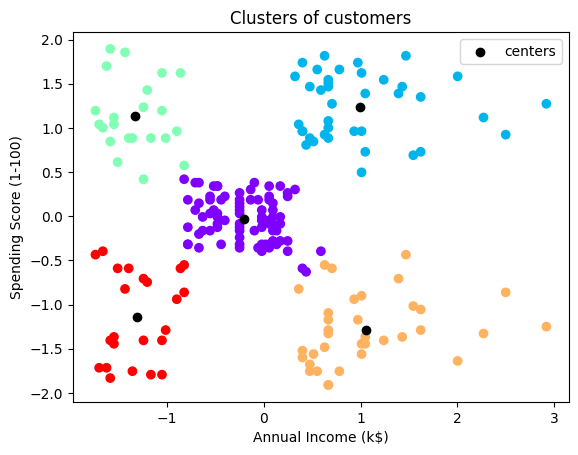

In [77]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', label='centers')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [78]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.5546571631111091
